In [62]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [53]:
oasis = pd.read_csv("C:\\Users\\602294\\Downloads\\cleaned_all_data_v1.csv")

In [54]:
oasis.head()

,Type,Catalog,Resell,Quoter,CustomerServiceRep,Manufacturer,Distributor,Stock,Quantity,PricePerCatalog,...,Released Date,Shipped Date,ActualDays,Gas_Diesel_Rocky_Mountain,PRCP,SNOW,tot_cases,new_case,tot_death,new_death
0,REPL,LMRC-213,0,JKR,JAM,WATT,CED/DN,NONE,1,0.0,...,8/10/2020,8/7/2020,2,2.357857,0,0,49893,457,1857,5
1,L2B,LHVQM10,0,RJT,LMH,COL,SPECCR,STOCKEDITEM,36,0.0,...,8/5/2020,7/31/2020,4,2.342571,0,0,46809,605,1838,16
2,REPL,CWP4-4040,0,JKR,JAM,COL,CED/BO,STOCKEDITEM,1,0.0,...,8/31/2020,8/28/2020,2,2.378143,0,0,56773,430,1937,6
3,REPL,93092316,0,JKR,ALN,COL,QED/GJ,NONE,2,0.0,...,10/5/2020,9/25/2020,9,2.341143,0,0,67926,709,2037,4
4,REPL,CSL4-4040,0,BDF,MAG,COL,AMERICANPUEBLO,STOCKEDITEM,2,0.0,...,8/24/2020,8/21/2020,2,2.367286,0,0,54586,356,1910,7


In [55]:
#oasis["NewReleaseDate"]= oasis["Released Date"].astype('datetime64[ns]')
oasis['Released Date']= pd.to_datetime(oasis['Released Date'])
oasis['Released_Date'] = pd.to_numeric(oasis['Released Date'])
oasis['Released_Date_dayofweek'] = oasis['Released Date'].dt.dayofweek
oasis['Released_Date_day'] = oasis['Released Date'].dt.day
oasis['Released_Date_month'] = oasis['Released Date'].dt.month
oasis['Released_Date_quarter'] = oasis['Released Date'].dt.quarter


In [56]:
oasis["Shipped Date"]= pd.to_datetime(oasis['Shipped Date'])
oasis['Shipped_Date']= pd.to_numeric(oasis["Shipped Date"])
oasis['Shipped_Date_dayofweek'] = oasis['Shipped Date'].dt.dayofweek
oasis['Shipped_Date_day'] = oasis['Shipped Date'].dt.day
oasis['Shipped_Date_month'] = oasis['Shipped Date'].dt.month
oasis['Shipped_Date_quarter'] = oasis['Shipped Date'].dt.quarter

In [57]:
oasis["diff"]= (oasis["Released Date"]-oasis["Shipped Date"]).dt.days.astype('int')

In [58]:
oasis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15780 entries, 0 to 15779
Data columns (total 33 columns):
Type                         15780 non-null object
Catalog                      15780 non-null object
Resell                       15780 non-null int64
Quoter                       15780 non-null object
CustomerServiceRep           15780 non-null object
Manufacturer                 15780 non-null object
Distributor                  15780 non-null object
Stock                        15780 non-null object
Quantity                     15780 non-null int64
PricePerCatalog              15780 non-null float64
TotalPrice                   15780 non-null float64
EntryDate                    15780 non-null object
Released Date                15780 non-null datetime64[ns]
Shipped Date                 15780 non-null datetime64[ns]
ActualDays                   15780 non-null int64
Gas_Diesel_Rocky_Mountain    15780 non-null float64
PRCP                         15780 non-null int64
SNOW     

In [59]:
oasis.corr()

,Resell,Quantity,PricePerCatalog,TotalPrice,ActualDays,Gas_Diesel_Rocky_Mountain,PRCP,SNOW,tot_cases,new_case,...,Released_Date_dayofweek,Released_Date_day,Released_Date_month,Released_Date_quarter,Shipped_Date,Shipped_Date_dayofweek,Shipped_Date_day,Shipped_Date_month,Shipped_Date_quarter,diff
Resell,1.000000,-0.005949,0.021827,0.249998,0.097568,0.197708,-0.066641,-0.020156,0.031811,-0.055951,...,0.082893,-0.050855,0.112705,0.120492,0.059134,0.025808,-0.110008,0.076095,0.003186,0.097742
Quantity,-0.005949,1.000000,-0.033134,0.194976,0.026517,-0.001448,0.031922,-0.007935,-0.015703,-0.004126,...,-0.008841,-0.011889,-0.005395,-0.015807,-0.022625,-0.001859,-0.005860,-0.021480,-0.027180,0.026662
PricePerCatalog,0.021827,-0.033134,1.000000,0.101664,0.222244,0.029768,0.022665,-0.017864,-0.053768,-0.045128,...,0.052348,0.013351,0.071134,0.062362,-0.047166,0.015749,-0.011231,-0.044673,-0.036006,0.222426
TotalPrice,0.249998,0.194976,0.101664,1.000000,0.155168,0.101129,0.044725,-0.025648,-0.085753,-0.095177,...,-0.003946,0.023941,0.001343,-0.016595,-0.079777,0.007654,-0.023797,-0.075632,-0.127508,0.155834
ActualDays,0.097568,0.026517,0.222244,0.155168,1.000000,0.091136,0.022432,-0.037058,-0.140217,-0.118175,...,-0.000802,0.002821,0.085799,0.086561,-0.130762,0.036100,0.002205,-0.129772,-0.128681,0.999952
Gas_Diesel_Rocky_Mountain,0.197708,-0.001448,0.029768,0.101129,0.091136,1.000000,0.107756,-0.059440,-0.181937,-0.415909,...,0.031896,-0.011149,-0.035791,-0.188358,-0.078557,0.053270,-0.129478,-0.058402,-0.245001,0.091042
PRCP,-0.066641,0.031922,0.022665,0.044725,0.022432,0.107756,1.000000,0.283777,-0.080898,-0.080064,...,-0.046644,0.063568,-0.085864,-0.122326,-0.088719,0.034874,0.105272,-0.106006,-0.141141,0.022625
SNOW,-0.020156,-0.007935,-0.017864,-0.025648,-0.037058,-0.059440,0.283777,1.000000,0.197827,0.189919,...,0.008250,0.063530,0.138097,0.127341,0.168875,-0.091002,0.072516,0.154862,0.150646,-0.037169
tot_cases,0.031811,-0.015703,-0.053768,-0.085753,-0.140217,-0.181937,-0.080898,0.197827,1.000000,0.765548,...,0.066772,0.011554,0.885183,0.817077,0.966018,0.011324,0.016969,0.952473,0.896968,-0.140807
new_case,-0.055951,-0.004126,-0.045128,-0.095177,-0.118175,-0.415909,-0.080064,0.189919,0.765548,1.000000,...,0.031070,-0.017080,0.545551,0.541241,0.605414,0.080321,0.026437,0.595236,0.634047,-0.118815


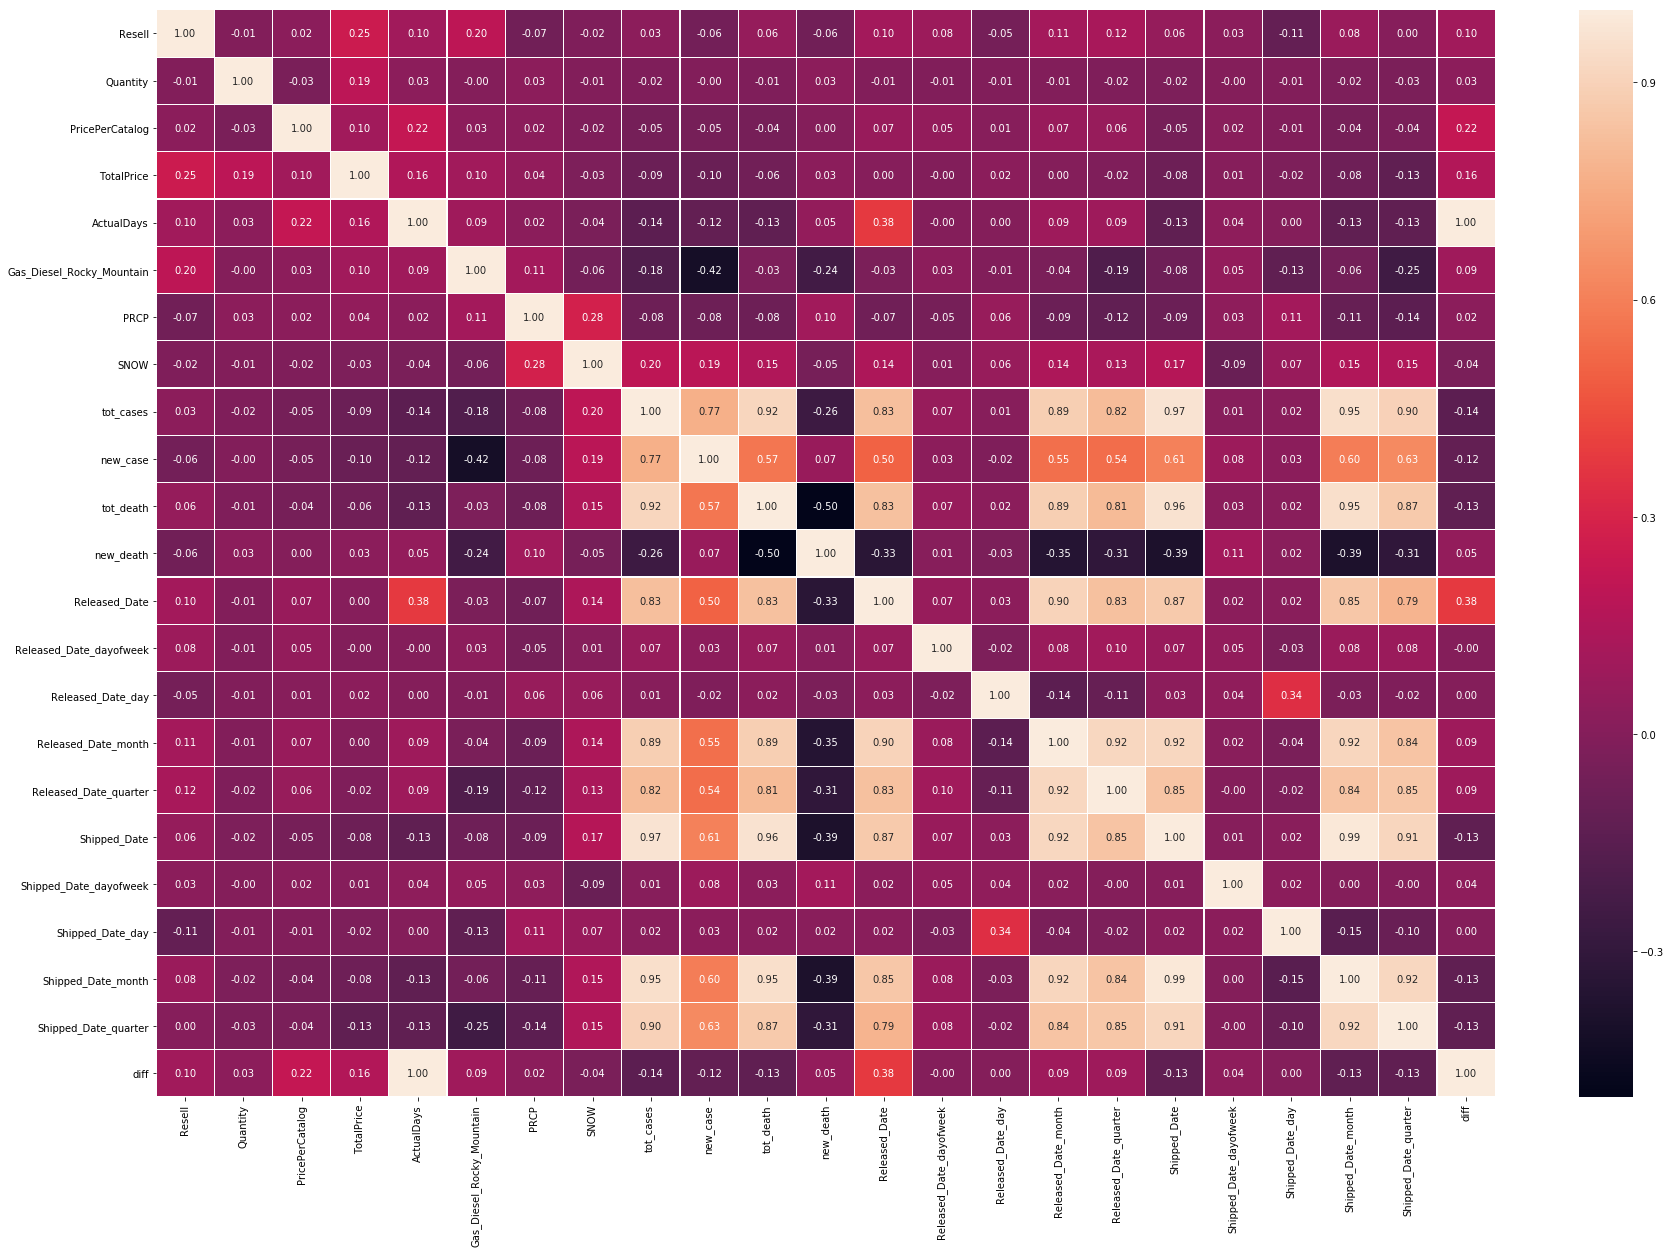

In [60]:
corr = oasis[oasis.columns].corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")

In [107]:
oasis[oasis['Resell','Quantity']].corr()

KeyError: ('Resell', 'Quantity')

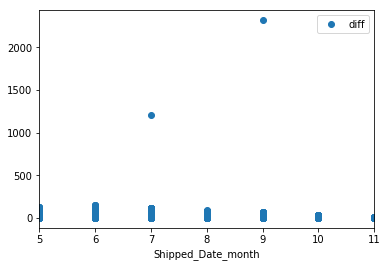

In [91]:
oasis.plot(y = "diff", x = 'Shipped_Date_month', style = 'o')

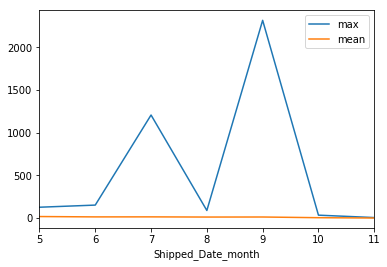

In [102]:
oasis.groupby('Shipped_Date_month')['diff'].agg(['max', 'mean']).plot()

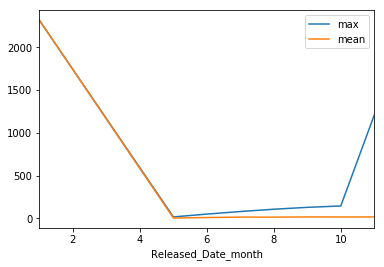

In [103]:
oasis.groupby('Released_Date_month')['diff'].agg(['max', 'mean']).plot()

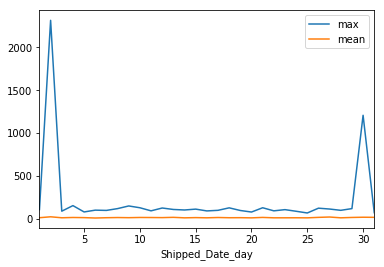

In [101]:
oasis.groupby('Shipped_Date_day')['diff'].agg(['max', 'mean']).plot()

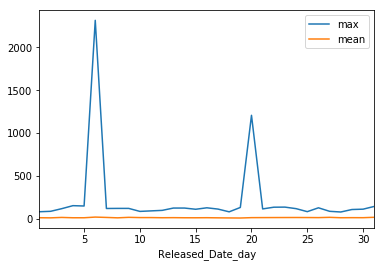

In [104]:
oasis.groupby('Released_Date_day')['diff'].agg(['max', 'mean']).plot()

In [19]:
manu = pd.get_dummies(oasis['Manufacturer'])
dfO = pd.concat([oasis,manu],axis = 1)

In [23]:
stk = pd.get_dummies(oasis['Stock'])


In [21]:
manu.corrwith(oasis['diff']).sort_values(ascending = True)

WATT           -0.227189
CON-TECH       -0.079307
COMPASS        -0.070886
HBA            -0.042400
DLE            -0.025523
TRACE          -0.024100
EXI            -0.020486
ASSUR          -0.015237
RPLIGHT        -0.015188
OXYGEN         -0.014553
BSCABLE        -0.010712
HUBBELL        -0.007865
DELRAY         -0.007598
TECH           -0.006550
CSL            -0.006051
WAGNER         -0.006041
HLIN           -0.005717
LIGHTNET USA   -0.004330
RSL            -0.004126
STRN           -0.003781
NORC           -0.003719
WILA           -0.003541
LUMINOSO       -0.003150
PREC           -0.002327
LUMENART       -0.001656
AFC            -0.001631
ELAN            0.000044
INDESSA         0.000367
JLC             0.000377
ARON            0.000443
                  ...   
GRAYPANTS       0.025247
USAL            0.025281
INTERLUX        0.025995
KENALL          0.027445
PROGRESS        0.028002
LITECONTROL     0.030458
BRUK            0.031435
ELLIP           0.031508
LUMOS           0.032269


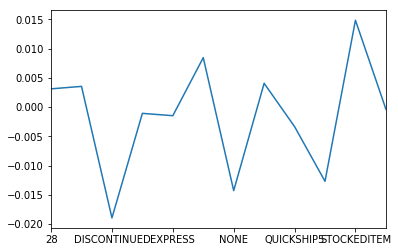

In [110]:
stk.corrwith(oasis['Shipped_Date']).

In [32]:
stk.corrwith(oasis['Released_Date']).sort_values()

DISCONTINUED              -0.037016
STOCKEDITEM               -0.028243
28                        -0.016750
STOCKED                   -0.007759
NONE                      -0.007512
TERRITORY                 -0.006618
CONFIGURATOR              -0.005525
EXPRESS                    0.002269
QUICKSHIP5                 0.009332
DISCWREMAININGINVENTORY    0.009527
QUICKSHIP                  0.027269
MADE-TO-ORDER              0.053740
dtype: float64

In [64]:
train, test = train_test_split(oasis, test_size=0.2)

In [70]:
print(train.count())
print(test.count())

Type                         12624
Catalog                      12624
Resell                       12624
Quoter                       12624
CustomerServiceRep           12624
Manufacturer                 12624
Distributor                  12624
Stock                        12624
Quantity                     12624
PricePerCatalog              12624
TotalPrice                   12624
EntryDate                    12624
Released Date                12624
Shipped Date                 12624
ActualDays                   12624
Gas_Diesel_Rocky_Mountain    12624
PRCP                         12624
SNOW                         12624
tot_cases                    12624
new_case                     12624
tot_death                    12624
new_death                    12624
Released_Date                12624
Released_Date_dayofweek      12624
Released_Date_day            12624
Released_Date_month          12624
Released_Date_quarter        12624
Shipped_Date                 12624
Shipped_Date_dayofwe

In [82]:
df = oasis.select_dtypes(include=np.number)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15780 entries, 0 to 15779
Data columns (total 23 columns):
Resell                       15780 non-null int64
Quantity                     15780 non-null int64
PricePerCatalog              15780 non-null float64
TotalPrice                   15780 non-null float64
ActualDays                   15780 non-null int64
Gas_Diesel_Rocky_Mountain    15780 non-null float64
PRCP                         15780 non-null int64
SNOW                         15780 non-null int64
tot_cases                    15780 non-null int64
new_case                     15780 non-null int64
tot_death                    15780 non-null int64
new_death                    15780 non-null int64
Released_Date                15780 non-null int64
Released_Date_dayofweek      15780 non-null int64
Released_Date_day            15780 non-null int64
Released_Date_month          15780 non-null int64
Released_Date_quarter        15780 non-null int64
Shipped_Date                 15780 

In [83]:
x_train = df['Released_Date'].values

In [ ]:
y_train = df

In [ ]:
oasis.corr()

In [ ]:
oasis.dtypes

In [ ]:
df = oasis[['NewReleaseDate','NewDateShipped',"diff",'Manufacturer']]

In [ ]:
df['NewReleaseDate'].value_counts()